# Assignment 1: Regression

This file is made for Datamining & Statistics.
This python code shows the relation between the country happiness ranking and two dependencies that influence the ranking.
A data set used to show the happinness per country.

## 1.1 Import all necessary libraries

- conda install scikit-learn
- conda install numpy
- conda install pandas
- conda install matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

## 1.2 Load csv file

This csv file can be found on:
* https://www.kaggle.com/unsdsn/world-happiness 

This dataset can also be found in the data directory.

In [2]:
worldHappinessCSV = pd.read_csv('data/2019.csv')

Here is a quick overview of the first rows of the csv file:
In the assesment we will use the following columns:
 - Overall rank <b>as</b> OverAll 
 - Freedom to make life choices <b>as</b> FreeChoices
 - Healthy life expectancy <b>as</b> LifeExpectancy

In [3]:
worldHappinessCSV.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


When the dataset is loaded, you need to specify the different columns you want to use.
When specifying these colums, we can convert them into numpy array's this makes them easier to work with.
We also need to reshape our column otherwhise it is not readable for our model.

In [4]:
xOverAll = worldHappinessCSV['Overall rank'].to_numpy().reshape((-1,1))
yFreeChoices = worldHappinessCSV['Freedom to make life choices'].to_numpy().reshape((-1,1))
yLifeExpectancy = worldHappinessCSV['Healthy life expectancy'].to_numpy().reshape((-1,1))

## 1.3 Visualize columns in a scatter plot.

The first step we can do with the data column is to create a simple plot. This give you a visualization of the data.
We are using a matplot for this, this matplot is used often through this assignment.
The <b>yFreeChoices</b> column is used for this plot.

When running this plot, you can see that when the overall countries ranking is getting higher, the freedom of making life choices is getting lower;

Table: 
 x = OverAll countries ranking 
 y = Freedom to make life choices in percentages


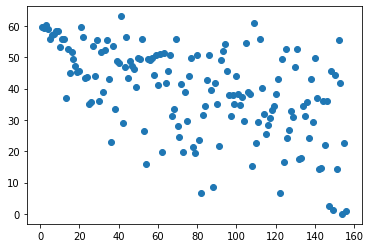

In [5]:
print('Table: \n x = OverAll countries ranking \n y = Freedom to make life choices in percentages')
plt.scatter(xOverAll, yFreeChoices*100)

We can do this also with the other column. This give you a visualization of the data.
We are using a matplot for this, this matplot is used often through this assignment.
The <b>yLifeExpectancy</b> column is used for this plot.

When running this plot, you can see that when the overall countries ranking is getting higher, the life expectancy is getting lower;

Table: 
 x = Over all countries ranking 
 y = Healthy life expectancy in years


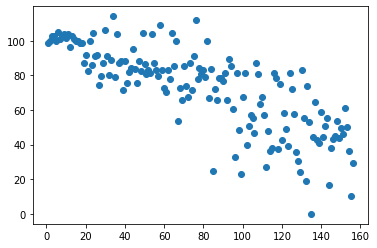

In [6]:
print('Table: \n x = Over all countries ranking \n y = Healthy life expectancy in years')
plt.scatter(xOverAll, yLifeExpectancy*100)

## 2. Calculate  Regression

The linear regression equation can be done in different ways. You can do it all manually, but you also can do it with sklearn.
Thats what we are going to do, calculate the regression with sklearn and display it in the plot.

We can create a function for calculating the regression, so we can use it more often in the future.

This function works with the following steps:
1. The first step of this function is to create a model. This model is created with the train data that has been given;
2. When the model is made, we can do a prediction with the test data;
3. You can calculate the coefficient with the model;
4. You can caluclate the interception with the model;
5. You can determine the coefficient of determination from the model. This is been done with the test data and prediction that was done earlier;
6. Scatter the plot (optional).

In [7]:
def calculateRegression(xTrain, xTest, yTrain, yTest, plot):
    model = LinearRegression().fit(xTrain,yTrain)
    yPrediction = model.predict(xTest)

    coef = model.coef_[0]
    print('The coef: ',coef[0])

    intercept = model.intercept_
    print('The intercept: ',intercept[0])
    
    det = metrics.r2_score(yTest, yPrediction)
    print('Coefficient of determination: ',det)
        
    if(plot):
        plt.scatter(xTest, yTest*100, color='blue')
        plt.scatter(xTrain, yTrain*100, color='orange')
        prediction = ( intercept + coef * xTest ) * 100
        plt.plot(xTest, prediction, color = 'red')
        print('\nLegenda: \n - Blue is the test data; \n - Orange is the train data;\n - Red line is the linear prediction.')

To call this function, we only need to give the xTest, xTrain and yTest, yTrain values

## 2.1 Calculate regression for free choices

We can calculate the coefficient of the model with the function we created above. 
We already got our colums sorted out. But that isn't enough;
We need to split our columns in to a test en train column, this is for a better accurancy and to get a better overview.

The coef:  -0.0019357024436268727
The intercept:  0.5482889227882211
Coefficient of determination:  0.11657683219308457

Legenda: 
 - Blue is the test data; 
 - Orange is the train data;
 - Red line is the linear prediction.


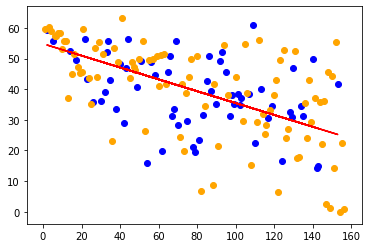

In [8]:
xOverAll_train, xOverAll_test, yFreeChoices_train, yFreeChoices_test = train_test_split(xOverAll, yFreeChoices, test_size=0.4, random_state=101)
calculateRegression(xOverAll_train, xOverAll_test, yFreeChoices_train, yFreeChoices_test, 1)

So in this plot you can see the blue, orange dotes and a red line. The blue dots mean the test data, the orange dots mean the train data and the red line is the linear prediction. This red line is showing a decrease, which reflects to our earlier statement.

## 2.2  Calculate regression for healthy life expectancy

We need to do the same with this data; 

We already got our colums sorted out. But that isn't enough;
We need to split our columns in to a test en train column, this is for a better accurancy and to get a better overview.

The coef:  -0.004246020724669374
The intercept:  1.0479049120829242
Coefficient of determination:  0.45869615787281404

Legenda: 
 - Blue is the test data; 
 - Orange is the train data;
 - Red line is the linear prediction.


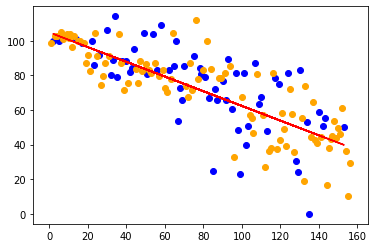

In [9]:
xOverAll_train, xOverAll_test, yLifeExpectancy_train, yLifeExpectancy_test = train_test_split(xOverAll, yLifeExpectancy, test_size=0.4, random_state=101)
calculateRegression(xOverAll_train, xOverAll_test, yLifeExpectancy_train, yLifeExpectancy_test, 1)

So in this plot you can see the blue, orange dotes and a red line. The blue dots mean the test data, the orange dots mean the train data and the red line is the linear prediction. This red line is showing a decrease, which reflects to our earlier statement.

## 3. Multiple linear regression

We come now to the part were we can combine muliple values. We first need to combine the values in some ycombined array.
We do this to import again the two columns from the csv file.

After the import, we need to split it into a test and train set. We can do this with an module from sklearn.
After our test and train set we can use it in our function we created earlier.

In [10]:
yCombined = worldHappinessCSV[['Freedom to make life choices','Healthy life expectancy']]
xOverAll_train, xOverAll_test, y_train, y_test = train_test_split(xOverAll, yCombined, test_size=0.4, random_state=101)
calculateRegression(xOverAll_train, xOverAll_test, y_train, y_test, 0)

The coef:  -0.0019357024436268727
The intercept:  0.5482889227882211
Coefficient of determination:  0.28763649503294936


You can see that the the calculated coefficient of the model. This is not that right actually, because it contains two columns right now, instead of one.
We need to recalculate the coefficient on a different way. 
This can be done using the following formula:

\begin{equation*}
\bar{r}^2=1-(1-r^2)\frac{n-1}{n-p-1}
\end{equation*}

Which reflects to this code:


In [11]:
adjustedDetermination = 1-(1-0.28763649503294936) * (xOverAll_test.shape[0]-1) / (xOverAll_test.shape[0] - y_test.shape[1]-1)
print(adjustedDetermination)

0.2638910448673809


You can see that the coefficient is smaller and more accurate with formula;